#### Imports

In [1]:
import itertools
import operator
import pandas as pd
from plot import plot_distribution
from user import User
from utils import get_counts
from utils import get_distinct
from utils import get_mean_popularity
from utils import get_top_cooccurrence
from utils import get_scores
from utils import load_data

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

VERT = "#74d336"
BLEU = "#31ace0"

#### Loading the data

In [3]:
data = load_data()
users = [User(i, tracks) for i, tracks in enumerate(data)]

#### Basic stats

In [4]:
# Number of users
len(users)

10

In [5]:
# Number of tracks per user
[len(user.tracks) for user in users]

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]

In [6]:
# Number of distinct tracks
get_distinct(users, 'id')

250

In [7]:
# Number of distinct artist
get_distinct(users, 'artist')

37

In [8]:
# Number of distinct genre
get_distinct(users, 'genre')

12

#### Tops

In [28]:
# Artist sort by best mean score
scores = get_mean_popularity(users, "artist")
counts = get_counts(users, "artist")
pd.DataFrame(scores).set_index(0).join(pd.DataFrame(counts)).head(10)

,1,0
0,,
Duke Dumont,0.918638,4
Kaskade,0.750265,15
Stellardrone,0.699016,16
Confection,0.667384,20
Gossip,0.652559,8
Fred Falke,0.650885,14
M83,0.647604,16
Lenka,0.639941,12
Daft Punk,0.636427,22


In [29]:
# Genre sort by best mean score
scores = get_mean_popularity(users, "genre")
counts = get_counts(users, "genre")
pd.DataFrame(scores).set_index(0).join(pd.DataFrame(counts)).head(10)

,1,0
0,,
Acoustic,0.676906,36
Blues,0.614457,67
Electro,0.583838,83
Classical,0.536325,8
Jazz,0.528347,43
RnB,0.519434,93
Funk,0.512866,30
Rock,0.483596,30
Disco,0.469102,33


#### Distribution

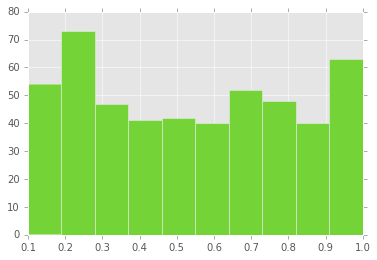

In [44]:
# Track scores distribution
r_scores = get_scores(users, "genre", rounding=True)
plt.hist(sum(r_scores.values(), []), color=VERT)
plt.show()

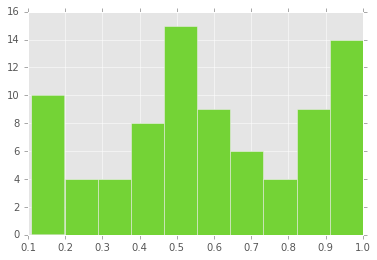

In [49]:
plt.hist(r_scores['Electro'], color=VERT)
plt.show()

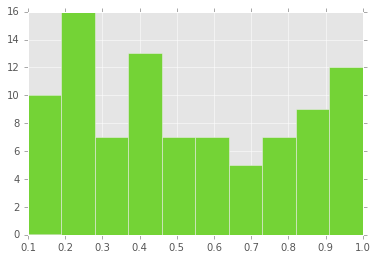

In [50]:
plt.hist(r_scores['RnB'], color=VERT)
plt.show()

RnB and Electro does not have the same distribution, and RnB seems to be a risky genre.

#### Correlation

In [58]:
get_top_cooccurrence(users, field='artist', min_score=0.8, limit=20)

(u'Daft Punk', u'Miguel Campbell') 7
(u'Kaskade', u'Stellardrone') 6
(u'Gossip', u'Stellardrone') 6
(u'Bob Sinclar', u'Miguel Campbell') 6
(u'Miguel Campbell', u'Stellardrone') 6
(u'Confection', u'Daft Punk') 5
(u'Confection', u'Stellardrone') 5
(u'Lenka', u'Stellardrone') 5
(u'Daft Punk', u'Stellardrone') 4
(u'Kaskade', u'Lenka') 4
(u'Duke Dumont', u'Stellardrone') 4
(u'Gossip', u'Miguel Campbell') 4
(u'Stellardrone', u'The Offspring') 4
(u'Coldplay', u'Daft Punk') 4
(u'M83', u'Stellardrone') 4
(u'Michael Jackson', u'Stellardrone') 4
(u'Kaskade', u'Miguel Campbell') 4
(u'Michael Jackson', u'Miguel Campbell') 4
(u'Muse', u'Stellardrone') 4
(u'Eminem', u'Miguel Campbell') 4


We check how many times two artists appear for a same user with a fixed `min_score`

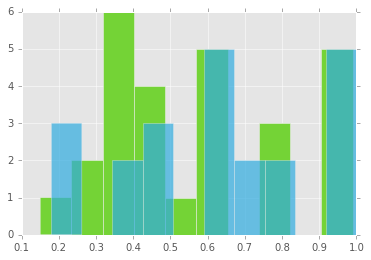

In [56]:
# Two artists highly correlated
r_scores = get_scores(users, "artist", rounding=True)
plot_distribution(r_scores, 'Miguel Campbell')
plot_distribution(r_scores, 'Daft Punk', color=BLEU, alpha=0.7)
plt.show()

#### The standard deviation is almost the same for every user

In [31]:
[pd.DataFrame(user.tracks).score.std() for user in users]

[0.26670720778742241,
 0.28086952218563671,
 0.28405179598068475,
 0.27965010549352715,
 0.29807011840183578,
 0.25344469875260389,
 0.25766450940783503,
 0.27828697713814504,
 0.25676341495761307,
 0.27965331333895077]